# Load Model and Predict output here 

In [253]:
import numpy as np
import pandas as pd

ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [254]:
import tensorflow as tf

# load the .tflite model
interpreter = tf.lite.Interpreter(model_path="models/model.tflite")

# get the list of available signatures
found_signatures = list(interpreter.get_signature_list().keys())
print("Signatures:", found_signatures)

# get the callable for the default signature
prediction_fn = interpreter.get_signature_runner("serving_default")


Signatures: ['serving_default']


In [255]:
import pandas as pd

train = pd.read_csv('asl-signs/train.csv')
train['sign_ord'] = train['sign'].astype('category').cat.codes

# Dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()

pq_file = 'app/output.parquet'
xyz_np = load_relevant_data_subset(pq_file)

prediction = prediction_fn(inputs=xyz_np)
sign = prediction['outputs'].argmax()


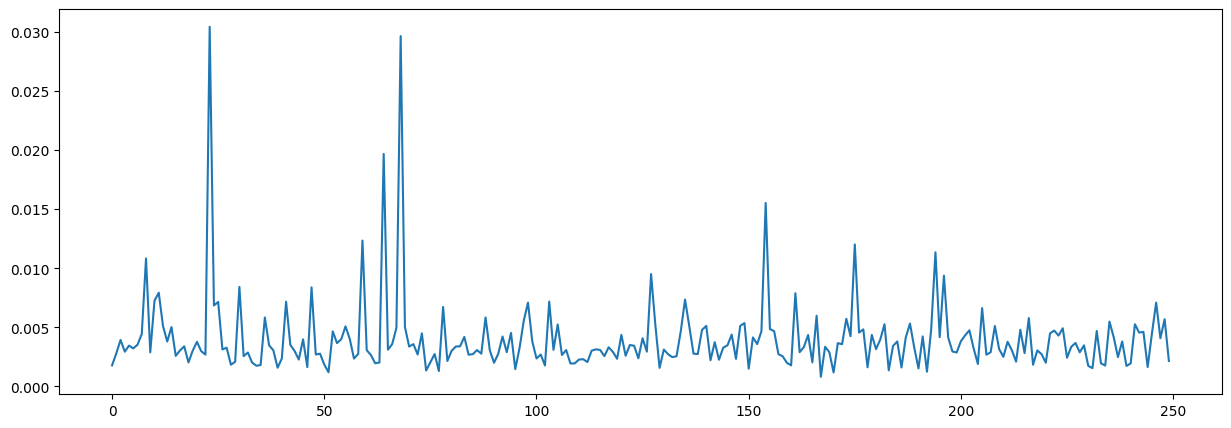

In [260]:
pd.Series(prediction['outputs']).plot(figsize=(15,5))
plt.show()

In [261]:
sign

23

In [262]:
ORD2SIGN[sign]

'bird'